Now first import the libraries:


In [1]:
import pandas as pd 
from fbprophet import Prophet

Load our dataset 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [3]:
df= pd.read_csv('BTC-USD.csv')

Print our data set so that we get a glimpse of data

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-29,13271.298828,13612.047852,12980.059570,13437.882813,13437.882813,56499499598
1,2020-10-30,13437.874023,13651.516602,13136.198242,13546.522461,13546.522461,30581485201
2,2020-10-31,13546.532227,14028.213867,13457.530273,13780.995117,13780.995117,30306464719
3,2020-11-01,13780.995117,13862.033203,13628.377930,13737.109375,13737.109375,24453857900
4,2020-11-02,13737.032227,13808.323242,13243.160156,13550.489258,13550.489258,30771455468
...,...,...,...,...,...,...,...
361,2021-10-25,60893.925781,63729.324219,60691.800781,63039.824219,63039.824219,31064911614
362,2021-10-26,63032.761719,63229.027344,59991.160156,60363.792969,60363.792969,34878965587
363,2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,43657076893
364,2021-10-28,58470.730469,62128.632813,58206.917969,60622.136719,60622.136719,45257083247


The Facebook Prophet model only works with data set that contains a string time-series format in a column names "ds" and continous values in a column "y". So, we need to modify our data accordingly.

In [5]:
df = df[["Date", "Close"]]

In [6]:
df

,Date,Close
0,2020-10-29,13437.882813
1,2020-10-30,13546.522461
2,2020-10-31,13780.995117
3,2020-11-01,13737.109375
4,2020-11-02,13550.489258
...,...,...
361,2021-10-25,63039.824219
362,2021-10-26,60363.792969
363,2021-10-27,58482.386719
364,2021-10-28,60622.136719


In [7]:
df.columns = ["ds", "y"]

In [8]:
df

,ds,y
0,2020-10-29,13437.882813
1,2020-10-30,13546.522461
2,2020-10-31,13780.995117
3,2020-11-01,13737.109375
4,2020-11-02,13550.489258
...,...,...
361,2021-10-25,63039.824219
362,2021-10-26,60363.792969
363,2021-10-27,58482.386719
364,2021-10-28,60622.136719


Now, lets fit the data set we have into our model :

In [9]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now, lets make some predictions. The malke_future_dataframe method in Prophet model has a parameter named as "Periods", we can directly use it to set the amount of time we need to make predictions. Now, lets make predictions for the next 730 days: 

In [18]:
future = prophet.make_future_dataframe(periods=730)
print(future)

             ds
0    2020-10-29
1    2020-10-30
2    2020-10-31
3    2020-11-01
4    2020-11-02
...         ...
1091 2023-10-25
1092 2023-10-26
1093 2023-10-27
1094 2023-10-28
1095 2023-10-29

[1096 rows x 1 columns]


Now its time to forecast our future results and try to print first 200 forecast results

In [19]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head(200)

,ds,yhat,yhat_lower,yhat_upper
0,2020-10-29,9406.903882,4210.749465,14632.922518
1,2020-10-30,10026.825062,4756.102709,15636.115470
2,2020-10-31,10275.574672,5298.853368,15578.096114
3,2020-11-01,10492.662268,5093.165762,15506.665078
4,2020-11-02,10726.128633,5457.831656,15891.520012
...,...,...,...,...
195,2021-05-12,47625.239412,42626.093302,52809.101010
196,2021-05-13,47254.617016,41730.391719,52417.842329
197,2021-05-14,47219.102283,41972.765105,52475.423052
198,2021-05-15,46812.415980,41370.081653,52146.222873


Now lets plot our predictions: for better visualization of our future predictions

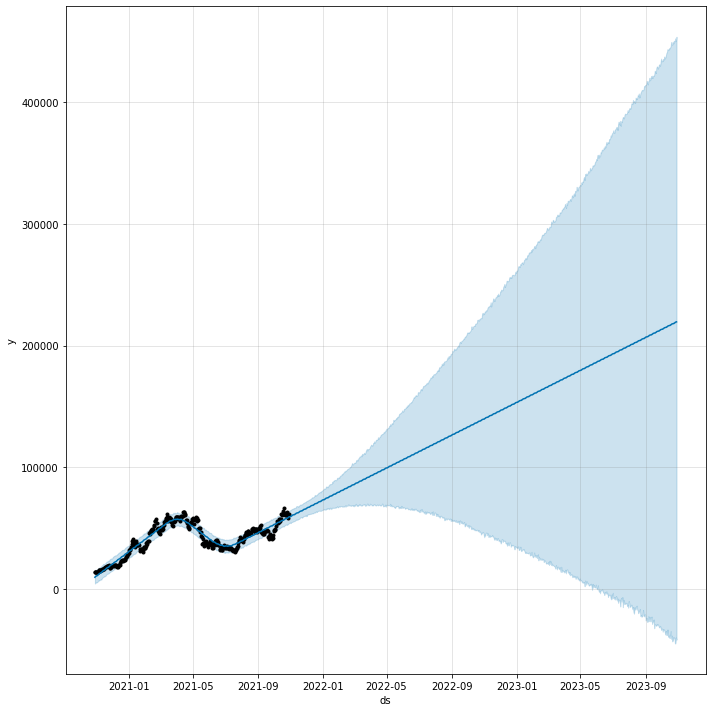

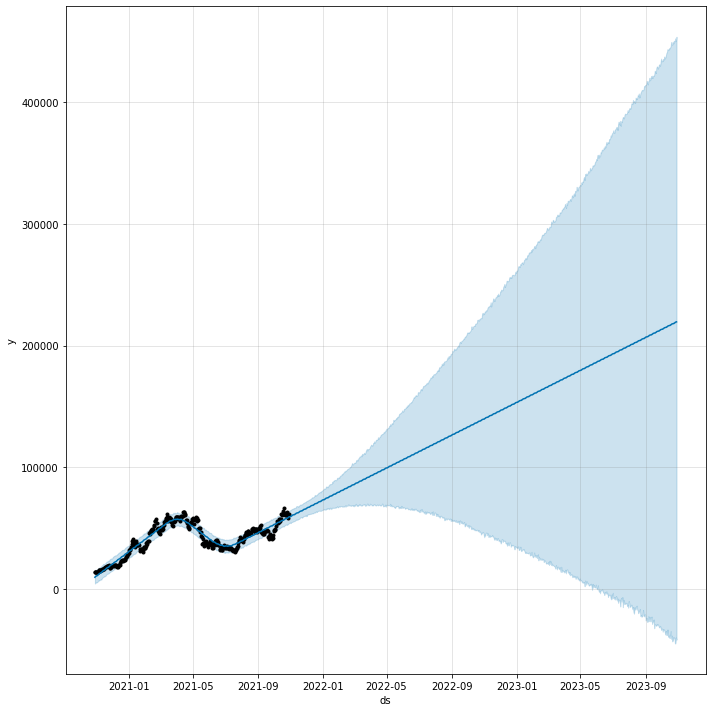

In [20]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(10,10))

From the above interpretations of the forecast calculated by the Facebook prophet model. we can easily see the current momentum for the bitcoin prices has sky-rocketed and still we are likely to see a very rapid increase in price of bitcoin. 